# <center>Modeling and Simulation of the skyTran MagLev Personal Rapid Transit Vehicle</center>
#### <center> - Abhinav Kamath</center>
#### <center> Professor: Dr. Jason Moore</center>

<br>

<center><video controls src="Media/skyTran_web1.mov" width="750" /></center>

##### <center>The skyTran network of personal rapid transit vehicles. Credit: skyTran</center>

## 1. Motivation

___skyTran___ is an elevated transportation infrastructure that utilizes a patented method of passive magnetic levitation (MagLev). Unlike other forms of passive MagLev, the _Bogie_ reacts against vertical conductive surfaces. The _Bogie_ is the driving portion of the vehicle; the passenger-carrying portion hangs below the track and is called the _Pod_. This design enables the vehicle to control its altitude in software. A strong simulation environment is critical to developing control algorithms without putting hardware at risk. 

__The objective of this project is to model and simulate the vehicle, and to then to determine a favorable maximum levitation height by analyzing the stability of the vehicle system at different maximum-height levitation regimes.__

<img src="Media/skyTran-vehicle.png" width="750"/>

##### <center>Figure 1: A render of the skyTran MagLev vehicle. Credit: skyTran</center>

## 2. Background

Conventional trains leverage the friction between wheels and rails to drive forward. In contrast, a MagLev vehicle levitates on a guideway, replacing wheels with electromagnets. Levitation is advantageous in numerous ways, such as high speeds, reduction in maintenance costs, reduced noise and vibration levels, quick acceleration and deceleration, and so on. This technology also facilitates emission-free mass transportation.

Though the concept of MagLev trains was introduced in the 1930s, the
technology reached maturity only in the 1980s. The first practical
public MagLev train service was launched in Shanghai in 2003. Advances
in modern technology have enabled full-scale implementation of MagLev
trains, which are currently operational in many countries. NASA has
investigated the concept of Magnetic Launch Assist, which makes use of
both magnetic levitation and magnetic propulsion to propel launch
vehicles to 183 meters per second in less than 10 seconds.

*skyTran* is a novel take on the personal rapid transit (PRT)
infrastructure, making use of a network of lightweight *Pods* that run
on elevated guideways, thus facilitating transportation of people and
freight from one place to another without the need for intermediate
stops.

## 3. Problem Formulation

<img src="Media/SDS3_Image_A.JPG" width="750"/>

##### <center>Figure 2: A CAD-model of the Split-Bogie configuration of the vehicle. Credit: skyTran</center>

### 3.1 The Vehicle

The vehicle system that has been modeled, simulated and analyzed, is the *Bogie*, which is a cart-like rectangular vehicle with a rotary bearing connecting the front and rear chassis shown in figure 2. It has four wheels, one at each corner of the body, and four magnetic *wings*, which, at a high-level, function like an airfoil/fixed-wing, with the ability to effect a lift force on the vehicle. The vehicle is propelled using an axial motor belt and is centered using a set of urethane wheels that roll against the reaction plates, which are shown in figure 3.

<img src="Media/views.png" width="350"/>

##### <center>Figure 3: Principal views of the vehicle. Credit: skyTran</center>

### 3.2 Dynamics

The vehicle is subject to five important classes of force & torque
inputs:

#### 3.2.1 Magnetic *Wing*: Magnetic Lift and Drag Forces

The vehicle has four *wings*, located at the corners of the rectangular
*Bogie* body. A simplified black-box model of the *wing* as shown in
figure 4 will be considered for the purpose of this project.

The forces effected by the *wing* arise from the interaction of eddy
currents that are induced by the motion of the wing, with the conductive
track plate (figure 4).

<img src="Media/magwing.png" width="400"/>

##### <center>Figure 4: The Magnetic Wing. Credit: skyTran</center>

#### 3.2.2 *Wing* Actuators: Pitching Moment

The *wing* actuators cause pitching moments between the chassis and the
*wing*.

#### 3.2.3 Wheels: Normal Force

The vehicle has four wheels, located beneath the *wings*. They are
active before *lift-off*; *lift-off* is achieved when vehicle reaches
critical velocity.

#### 3.2.4 Belt: Drive Force

The belt pulls the vehicle forward x-direction.

#### 3.2.5 Belt: Centering Force

The belt also provides a lateral centering force, keeping the vehicle
very near y=0.

### 4. The Vehicle Model

A simplified version of the vehicle has been modeled. The independent rotational degree of freedom between the front and rear chassis has been eliminated in order to speed-up computation. It is assumed that the track, as defined by motor force direction and reaction plates, is straight, and that there is negligible yaw and lateral motion. 

The magnetic *wings* are at a fixed angle for each simulation run. Gravitational, propulsive, frictional and lift forces have been considered. The drag force is assumed to be negligible. The lift force has been modeled as a function of the pitch-angles of the wings, the speed of the mass-center of the vehicle in the axial direction, and the levitation height. 

<img src="Media/mag_wing.png" width="500"/>

##### <center>Figure 5: The lift force generated by the magnetic wing. Credit: skyTran</center>

The magnetic lift-force generated by each wing is modeled as follows:

$\begin{equation}\label{eq2}
    F_L = C_L V_x sin(\alpha) (H-dz)
\end{equation}$

where, 

$F_L \rightarrow$ The lift-force

$C_L \rightarrow$ The coefficient of lift

$V_x \rightarrow$ The axial speed of the vehicle

$\alpha \rightarrow$ The pitch-angle of the wing

$H \rightarrow$ The maximum levitation height 

$dz \rightarrow$ The altitude of the vehicle

The modeled vehicle is shown in figure 6.

<img src="Media/Model.png" width="350"/>

##### <center>Figure 6: The Vehicle Model</center>

## 5. Modeling

### 5.1 Dependencies

In [1]:
import sympy as sm
import sympy.physics.mechanics as me
from pydy.system import System
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
me.init_vprinting()

### 5.2 Reference Frames

Reference frames are attached to the track (inertial) and each of the five rigid bodies. The reference frame of the _Bogie_ is oriented relative to the inertial reference frame and the _wings_ are oriented relative to the _Bogie_.

In [2]:
N = me.ReferenceFrame('N') # Inertial Reference Frame

bpitch, broll = me.dynamicsymbols('b_pitch, b_roll')

B = N.orientnew('B', 'Body', [-bpitch, broll, 0], 'YXZ')

alpha1, alpha2, alpha3, alpha4 = sm.symbols('alpha_1, alpha_2, alpha_3, alpha_4')

W1 = B.orientnew('W1', 'Axis', [alpha1, -B.y])
W2 = B.orientnew('W2', 'Axis', [alpha2, -B.y])
W3 = B.orientnew('W3', 'Axis', [alpha3, -B.y])
W4 = B.orientnew('W4', 'Axis', [alpha4, -B.y])

### 5.3 Points

The position vectors of significant points (in the sense of the applicability of Kane's method) are defined.

In [3]:
O = me.Point('O') # fixed point in the inertial reference frame
O.set_vel(N, 0)

#### 5.3.1 Mass Centers

In [4]:
dx, dz = me.dynamicsymbols('d_x, d_z') # coordinates of the mass-center of the vehicle relative to the point fixed in the inertial reference frame
lb, wb, hb = sm.symbols('l_b, w_b, h_b') # length, width and height of the Bogie
lw, ww, hw = sm.symbols('l_w, w_w, h_w') # length, width and height of each Wing

In [5]:
MB = O.locatenew('M_B', dx * N.x + dz * N.z)

In [6]:
MW1 = MB.locatenew('M_W1', (1/6) * lb * B.x - (1/2) * wb * B.y - (1/2) * ww * W1.y)

In [7]:
MW2 = MB.locatenew('M_W2', (1/6) * lb * B.x + (1/2) * wb * B.y + (1/2) * ww * W1.y)

In [8]:
MW3 = MB.locatenew('M_W3', - (1/6) * lb * B.x - (1/2) * wb * B.y - (1/2) * ww * W1.y)

In [9]:
MW4 = MB.locatenew('M_W4', - (1/6) * lb * B.x + (1/2) * wb * B.y + (1/2) * ww * W1.y)

#### 5.3.2 Wheels

In [10]:
P1 = MB.locatenew('P_1', (1/2) * lb * B.x - (1/2) * wb * B.y - (1/2) * hb * B.z)

In [11]:
P2 = MB.locatenew('P_2', (1/2) * lb * B.x + (1/2) * wb * B.y - (1/2) * hb * B.z)

In [12]:
P3 = MB.locatenew('P_3', - (1/2) * lb * B.x - (1/2) * wb * B.y - (1/2) * hb * B.z)

In [13]:
P4 = MB.locatenew('P_4', - (1/2) * lb * B.x + (1/2) * wb * B.y - (1/2) * hb * B.z)

### 5.4 Kinematical Differential Equations

The vehicle in the chosen configuration has four independent generalized coordinates: The axial speed of the mass-center of the vehicle, $d_x$, the vertical speed of the mass-center of the vehicle, $d_z$, the pitch-angle of the _Bogie_, $b_{pitch}$, and the roll-angle of the _Bogie_, $b_{roll}$. The generalized speeds are chosen to be the time-derivatives of the independent generalized coordinates. The system is holonomic.

In [14]:
u_dx = me.dynamicsymbols('u_d_x')
u_dz = me.dynamicsymbols('u_d_z')
u_bpitch = me.dynamicsymbols('u_b__pitch')
u_broll = me.dynamicsymbols('u_b__roll')

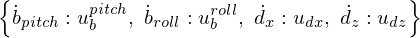

In [15]:
z1 = sm.Eq(u_dx, dx.diff())
z2 = sm.Eq(u_dz, dz.diff())
z3 = sm.Eq(u_bpitch, bpitch.diff())
z4 = sm.Eq(u_broll, broll.diff())
u = sm.solve([z1, z2, z3, z4], dx.diff(), dz.diff(), bpitch.diff(), broll.diff())
u

### 5.5 Velocities

The linear velocities of the significant points are defined. The generalized speeds are substituted in place of the derivatives of the independent generalized coordinates, and the resulting expressions are functions of the independent generalized coordinates and the generalized speeds only.

#### 5.5.1 Velocities of the mass centers

In [16]:
MB.set_vel(N, MB.pos_from(O).dt(N))

N_v_MB = MB.vel(N).subs(u)
N_v_MB

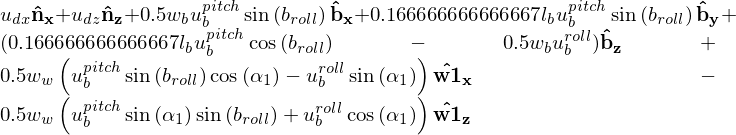

In [17]:
N_v_MW1 = MW1.v2pt_theory(MB, N, B).subs(u).simplify()
N_v_MW1

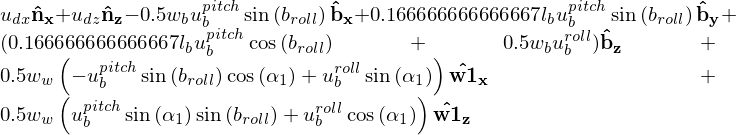

In [18]:
N_v_MW2 = MW2.v2pt_theory(MB, N, B).subs(u).simplify()
N_v_MW2

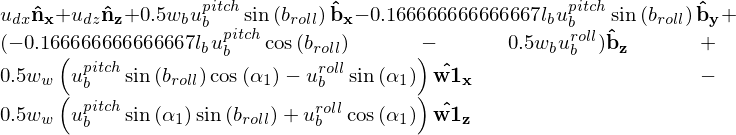

In [19]:
N_v_MW3 = MW3.v2pt_theory(MB, N, B).subs(u).simplify()
N_v_MW3

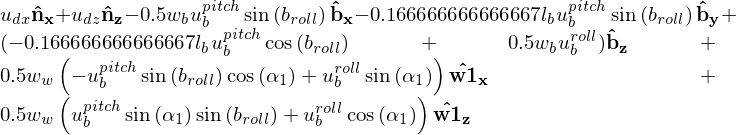

In [20]:
N_v_MW4 = MW4.v2pt_theory(MB, N, B).subs(u).simplify()
N_v_MW4

#### 5.5.2 Velocities of the wheels

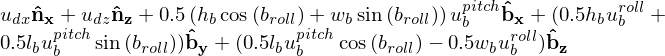

In [21]:
N_v_P1 = P1.v2pt_theory(MB, N, B).subs(u).simplify()
N_v_P1

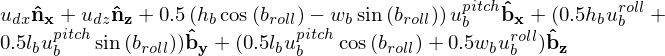

In [22]:
N_v_P2 = P2.v2pt_theory(MB, N, B).subs(u).simplify()
N_v_P2

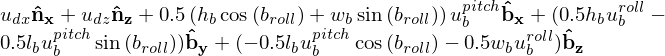

In [23]:
N_v_P3 = P3.v2pt_theory(MB, N, B).subs(u).simplify()
N_v_P3

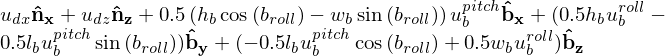

In [24]:
N_v_P4 = P4.v2pt_theory(MB, N, B).subs(u).simplify()
N_v_P4

### 5.6 Angular Velocities

The expressions for the angular velocities of the rigid bodies are made independent of the time-derivatives of the independent generalized coordinates by substituting the corresponding generalized speeds in their places.

In [25]:
B.set_ang_vel(N, B.ang_vel_in(N).subs(u))
B.ang_vel_in(N)

In [26]:
W1.set_ang_vel(N, W1.ang_vel_in(N).subs(u))
W1.ang_vel_in(N)

In [27]:
W2.set_ang_vel(N, W2.ang_vel_in(N).subs(u))
W2.ang_vel_in(N)

In [28]:
W3.set_ang_vel(N, W3.ang_vel_in(N).subs(u))
W3.ang_vel_in(N)

In [29]:
W4.set_ang_vel(N, W4.ang_vel_in(N).subs(u))
W4.ang_vel_in(N)

### 5.7 Inertia Dyadics

The inertia dyadics of the rigid bodies are computed.

In [30]:
mB, mW = sm.symbols('m_B, m_W')
IBx, IBy, IBz, IWx, IWy, IWz = sm.symbols('I_B_x, I_B_y, I_B_z, I_W_x, I_W_y, I_W_z')

In [31]:
IB = me.inertia(B, IBx, IBy, IBz)
IB

In [32]:
IW1 = me.inertia(W1, IWx, IWy, IWz)
IW1

In [33]:
IW2 = me.inertia(W2, IWx, IWy, IWz)
IW2

In [34]:
IW3 = me.inertia(W3, IWx, IWy, IWz)
IW3

In [35]:
IW4 = me.inertia(W4, IWx, IWy, IWz)
IW4

### 5.8 Loads

The loads (forces) acting on the vehicle are defined: gravitational, lift, propulsive, collision (contact/penetration) and frictional forces are considered.

#### 5.8.1 Gravitational Forces

In [36]:
g = sm.symbols('g')

G_B = -(mB * g) * N.z
G_W1 = -(mW * g) * N.z
G_W2 = -(mW * g) * N.z
G_W3 = -(mW * g) * N.z
G_W4 = -(mW * g) * N.z

#### 5.8.2 Lift Forces

In [37]:
CL, H = sm.symbols('C_L, H')

FL1 = CL * sm.sin(alpha1) * N_v_MB.dot(N.x).subs(u) * (H - dz) * N.z

FL2 = CL * sm.sin(alpha2) * N_v_MB.dot(N.x).subs(u) * (H - dz) * N.z

FL3 = CL * sm.sin(alpha3) * N_v_MB.dot(N.x).subs(u) * (H - dz) * N.z

FL4 = CL * sm.sin(alpha4) * N_v_MB.dot(N.x).subs(u) * (H - dz) * N.z

FL4

#### 5.8.3 Propulsive Force

In [38]:
FPmag = sm.symbols('FPmag')
FP = FPmag * N.x

#### 5.8.4 Contact Forces: Subsurface Travel Avoidance

Contact collision and frictional forces act on the wheels of the vehicle.

In [39]:
kc, cc, mu, vs = sm.symbols('k_c, c_c, mu, v_s')

P1_B = P1.pos_from(O).dot(N.z).subs(u)
penetration1 = (sm.Abs(P1_B) - P1_B)/2
vertical_force1 = (kc*penetration1**3 - P1_B)*(1-cc*P1.vel(N).dot(N.z).subs(u))
friction_force_x1 = -mu*vertical_force1*((2/(1+sm.exp(-P1.vel(N).dot(N.x).subs(u)/vs))) - 1)
friction_force_y1 = -mu*vertical_force1*((2/(1+sm.exp(-P1.vel(N).dot(N.y).subs(u)/vs))) - 1)
contact_force1 = friction_force_x1*N.x + friction_force_y1*N.y + vertical_force1*N.z  

P2_B = P2.pos_from(O).dot(N.z).subs(u)
penetration2 = (sm.Abs(P2_B) - P2_B)/2
vertical_force2 = (kc*penetration2**3 - P2_B)*(1-cc*P2.vel(N).dot(N.z).subs(u))
friction_force_x2 = -mu*vertical_force2*((2/(1+sm.exp(-P2.vel(N).dot(N.x).subs(u)/vs))) - 1)
friction_force_y2 = -mu*vertical_force2*((2/(1+sm.exp(-P2.vel(N).dot(N.y).subs(u)/vs))) - 1)
contact_force2 = friction_force_x2*N.x + friction_force_y2*N.y + vertical_force2*N.z 

P3_B = P3.pos_from(O).dot(N.z).subs(u)
penetration3 = (sm.Abs(P3_B) - P3_B)/2
vertical_force3 = (kc*penetration3**3 - P3_B)*(1-cc*P3.vel(N).dot(N.z).subs(u))
friction_force_x3 = -mu*vertical_force3*((2/(1+sm.exp(-P3.vel(N).dot(N.x).subs(u)/vs))) - 1)
friction_force_y3 = -mu*vertical_force3*((2/(1+sm.exp(-P3.vel(N).dot(N.y).subs(u)/vs))) - 1)
contact_force3 = friction_force_x3*N.x + friction_force_y3*N.y + vertical_force3*N.z 

P4_B = P4.pos_from(O).dot(N.z).subs(u)
penetration4 = (sm.Abs(P4_B) - P4_B)/2
vertical_force4 = (kc*penetration4**3 - P4_B)*(1-cc*P4.vel(N).dot(N.z).subs(u))
friction_force_x4 = -mu*vertical_force4*((2/(1+sm.exp(-P4.vel(N).dot(N.x).subs(u)/vs))) - 1)
friction_force_y4 = -mu*vertical_force4*((2/(1+sm.exp(-P4.vel(N).dot(N.y).subs(u)/vs))) - 1)
contact_force4 = friction_force_x4*N.x + friction_force_y4*N.y + vertical_force4*N.z 

### 5.9 Kane's Method

The model is set up to leverage the accessibility of Kane's method of solving multibody dynamics problems.

In [40]:
kdes = [z1.rhs - z1.lhs, z2.rhs - z2.lhs, z3.rhs - z3.lhs, z4.rhs - z4.lhs]

In [41]:
bogie = me.RigidBody('Bogie', MB, B, mB, (IB, MB))
wing1 = me.RigidBody('Wing_1', MW1, W1, mW, (IW1, MW1))
wing2 = me.RigidBody('Wing_2', MW2, W2, mW, (IW2, MW2))
wing3 = me.RigidBody('Wing_3', MW3, W3, mW, (IW3, MW3))
wing4 = me.RigidBody('Wing_4', MW4, W4, mW, (IW4, MW4))

bodies = [bogie, wing1, wing2, wing3, wing4]

In [42]:
loads = [(MB, G_B + FP),
         (MW1, G_W1 + FL1),
         (MW2, G_W2 + FL2),
         (MW3, G_W3 + FL3),
         (MW4, G_W4 + FL4),
         (P1, contact_force1),
         (P2, contact_force2),
         (P3, contact_force3),
         (P4, contact_force4),
        ]

In [43]:
kane = me.KanesMethod(N, (dx, dz, bpitch, broll), (u_dx, u_dz, u_bpitch, u_broll), kd_eqs=kdes)

The holonomic generalized active forces, $f_r$, and generalized inertia forces, $f_r*$, are computed using Kane's method.

In [44]:
fr, frstar = kane.kanes_equations(bodies, loads=loads)

In [45]:
# fr

In [46]:
# frstar

## 6. Simulation

The vehicle model is validated by means of a simulation, by defining the constants and specifying the initial conditions. One simulation case (maximum levitation height, $H$ = 1 meter) is demonstrated for a 50 second run.

The magnetic _wings_ are pitched at 15 degrees each. The coefficient of friction between the wheels and the track surface is chosen to be 0.2. An axial propulsive force of 10 N is applied. The vehicle starts at an initial axial speed of 10 m/s.

In [47]:
sys = System(kane)

In [48]:
sys.constants_symbols

In [49]:
sys.constants = {CL: 50,
                 FPmag: 10,
                 H: 1,
                 IBx: 1.02,
                 IBy: 19.07,
                 IBz: 20.04,
                 IWx: 0.00204587701,
                 IWy: 0.0982636759,
                 IWz: 0.0985611947,
                 alpha1: 0.261799,
                 alpha2: 0.261799,
                 alpha3: 0.261799,
                 alpha4: 0.261799,
                 cc: 0.1,
                 g: 9.81,
                 hb: 0.025,
                 kc: 5.0e7,
                 lb: 1.2,
                 mB: 34.04,
                 mW: 3.06451,
                 mu: 0.2, #1.0
                 vs: 0.01, #0.85
                 wb: 0.45,
                 ww: 0.025
                 }

In [50]:
sys.times = np.linspace(0.0, 50.0, num=1000)
t = me.dynamicsymbols._t

In [51]:
sys.initial_conditions = {dx: 0.0,
                          dz: 0.1,
                          bpitch: 0.0,
                          broll: 0.0,
                          u_dx: 10.0,
                          u_dz: 0.0,
                          u_bpitch: 0.0,
                          u_broll: 0.0
                         }

In [52]:
x = sys.integrate()

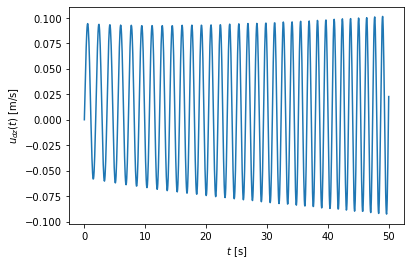

In [53]:
fig, ax = plt.subplots()
ax.plot(sys.times, x[:, 5])
ax.set_xlabel('{} [s]'.format(sm.latex(t, mode='inline'))); ax.set_ylabel('{} [m/s]'.format(sm.latex(u_dz, mode='inline')));
plt.show()

$\rightarrow$ Vertical speed of the mass-center of the vehicle

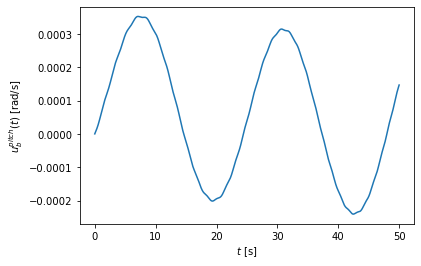

In [54]:
fig, ax = plt.subplots()
ax.plot(sys.times, x[:, 6])
ax.set_xlabel('{} [s]'.format(sm.latex(t, mode='inline'))); ax.set_ylabel('{} [rad/s]'.format(sm.latex(u_bpitch, mode='inline')));
# plt.show()

$\rightarrow$ Pitch rate of the _Bogie_

## 7. 3D Visualization

A 3D animation of the simulation is developed using pythreejs and PyDy (_Courtesy of Dr. Jason Moore_), to gain more insight into the behavior of the vehicle under different levitation regimes.

In [55]:
from pydy.viz.shapes import Cube, Cylinder, Sphere, Plane
from pydy.viz.visualization_frame import VisualizationFrame
from pydy.viz import Scene
from ipywidgets import Image, Video
import pythreejs as pjs

In [56]:
bogie_shape = Cube(1.2, color='red')
wing1_shape = Cube(0.4, color='green')
wing2_shape = Cube(0.4, color='green')
wing3_shape = Cube(0.4, color='green')
wing4_shape = Cube(0.4, color='green')

In [57]:
v1 = VisualizationFrame('Bogie',
                        N.orientnew('Bogie', 'Body', [-bpitch, broll, 0], 'YXZ'),
                        MB,
                        bogie_shape)

v2 = VisualizationFrame('Wing1', 
                        B.orientnew('Wing1', 'Axis', (alpha1, -B.y)),
                        MW1.locatenew('M_W_1', (1/6) * lb * B.x),
                        wing1_shape)

v3 = VisualizationFrame('Wing2', 
                        B.orientnew('Wing2', 'Axis', (alpha1, -B.y)),
                        MW2.locatenew('M_W_2', (1/6) * lb * B.x),
                        wing2_shape)

v4 = VisualizationFrame('Wing3', 
                        B.orientnew('Wing3', 'Axis', (alpha1, -B.y)),
                        MW3.locatenew('M_W_3', -(1/6) * lb * B.x),
                        wing3_shape)

v5 = VisualizationFrame('Wing4', 
                        B.orientnew('Wing4', 'Axis', (alpha1, -B.y)),
                        MW4.locatenew('M_W_4', -(1/6) * lb * B.x),
                        wing4_shape)

In [58]:
scene = Scene(N, O, v1, v2, v3, v4, v5, system=sys)
scene.create_static_html(overwrite=True, silent=True)

In [59]:
bogie_mesh = pjs.Mesh(
    pjs.BoxBufferGeometry(1.2, 0.45, 0.025),
    pjs.MeshStandardMaterial(color='red'),
    name="Bogie"
)

wing1_mesh = pjs.Mesh(
    pjs.BoxBufferGeometry(height=0.025, width=0.4, depth=0.025),
    pjs.MeshStandardMaterial(color='green'),
    name='Wing1'
)

wing2_mesh = pjs.Mesh(
    pjs.BoxBufferGeometry(height=0.025, width=0.4, depth=0.025),
    pjs.MeshStandardMaterial(color='green'),
    name='Wing2'
)

wing3_mesh = pjs.Mesh(
    pjs.BoxBufferGeometry(height=0.025, width=0.4, depth=0.025),
    pjs.MeshStandardMaterial(color='green'),
    name='Wing3'
)

wing4_mesh = pjs.Mesh(
    pjs.BoxBufferGeometry(height=0.025, width=0.4, depth=0.025),
    pjs.MeshStandardMaterial(color='green'),
    name='Wing4'
)

In [60]:
bogie_matrices = v1.evaluate_transformation_matrix(x, list(sys.constants.values()))
wing1_matrices = v2.evaluate_transformation_matrix(x, list(sys.constants.values()))
wing2_matrices = v3.evaluate_transformation_matrix(x, list(sys.constants.values()))
wing3_matrices = v4.evaluate_transformation_matrix(x, list(sys.constants.values()))
wing4_matrices = v5.evaluate_transformation_matrix(x, list(sys.constants.values()))

bogie_track = pjs.VectorKeyframeTrack(
    name='scene/Bogie.matrix',
    times=list(sys.times),
    values=bogie_matrices)

wing1_track = pjs.VectorKeyframeTrack(
    name='scene/Wing1.matrix',
    times=list(sys.times),
    values=wing1_matrices)

wing2_track = pjs.VectorKeyframeTrack(
    name='scene/Wing2.matrix',
    times=list(sys.times),
    values=wing2_matrices)

wing3_track = pjs.VectorKeyframeTrack(
    name='scene/Wing3.matrix',
    times=list(sys.times),
    values=wing3_matrices)

wing4_track = pjs.VectorKeyframeTrack(
    name='scene/Wing4.matrix',
    times=list(sys.times),
    values=wing4_matrices)

In [61]:
bogie_mesh.matrixAutoUpdate = False
wing1_mesh.matrixAutoUpdate = False
wing2_mesh.matrixAutoUpdate = False
wing3_mesh.matrixAutoUpdate = False
wing4_mesh.matrixAutoUpdate = False

In [62]:
bogie_mesh.matrix = bogie_matrices[0]
wing1_mesh.matrix = wing1_matrices[0]
wing2_mesh.matrix = wing2_matrices[0]
wing3_mesh.matrix = wing3_matrices[0]
wing4_mesh.matrix = wing4_matrices[0]

In [63]:
x_arrow = pjs.ArrowHelper(dir=[1, 0, 0], length=2.0, color='blue')
y_arrow = pjs.ArrowHelper(dir=[0, 1, 0], length=2.0, color='red')
z_arrow = pjs.ArrowHelper(dir=[0, 0, 1], length=2.0,color='green')

In [64]:
view_width = 960
view_height = 720

camera = pjs.PerspectiveCamera(position=[1, 1, 1],
                               aspect=view_width/view_height)
key_light = pjs.DirectionalLight(position=[0, 10, 10])
ambient_light = pjs.AmbientLight()

scene_pjs = pjs.Scene(children=[bogie_mesh, wing1_mesh, wing2_mesh, wing3_mesh, wing4_mesh,
                                x_arrow, y_arrow, z_arrow, 
                                camera, key_light, ambient_light])

controller = pjs.OrbitControls(controlling=camera)
renderer = pjs.Renderer(camera=camera, scene=scene_pjs, controls=[controller], width=view_width, height=view_height)

In [65]:
renderer

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, position=(1.0, 1.0, 1.0), quaternion=(0.0, 0.0, 0…

In [66]:
clip = pjs.AnimationClip(tracks=[bogie_track, wing1_track, wing2_track, wing3_track, wing4_track], duration=sys.times[-1])
action = pjs.AnimationAction(pjs.AnimationMixer(scene_pjs), clip, scene_pjs)
action

AnimationAction(clip=AnimationClip(duration=50.0, tracks=(VectorKeyframeTrack(name='scene/Bogie.matrix', times…

## 8. Results and Conclusion

### 8.1 Case 1: 

H = 10 [m]

<center><video controls src="Media/MagLev_unstable.mov" width="750" /></center>

##### <center>The vehicle displays extreme instability, with the maximum levitation height set to ten meters.</center>

<img src="Media/Plot_ten.png" width="1100" />

##### <center>Figure 7: Vertical speed and vehicle pitch rate for Case 1.</center>

### 8.2 Case 2: 

H = 0.5 [m]

<center><video controls src="Media/MagLev_Friction.mov" width="750" /></center>

##### <center>The vehicle comes to a halt due to friction, with the maximum levitation height set to half a meter.</center>

<img src="Media/Plot_half.png" width="1100" />

##### <center>Figure 7: Vertical speed and vehicle pitch rate for Case 2.</center>

### 8.3 Case 3: 

H = 1 [m]

<center><video controls src="Media/MagLev_Flyby.mov" width="750" /></center>

##### <center>The vehicle is fairly stable, with the maximum levitation height set to one meter.</center>

<img src="Media/Plot_one.png" width="1100" />

##### <center>Figure 8: Vertical speed and vehicle pitch rate for Case 3.</center>

The vehicle is fairly stable in _Case 3_, with the maximum levitation height set to 1 meter. This would be the most favorable maximum levitation height among the simulations cases that were run. The magnitudes of the vertical speed and the pitch rate are relatively extremely low values in this case, and further stability of the vehicle system can be ensured by designing appropriate control systems.

## 9. Further Extensions/Future Work

As an extension of this project, the vehicle system has been linearized in order to enable the design of control systems to further stabilize the MagLev vehicle.

### 9.1 Linearization

In [67]:
x = sm.Matrix([u_dx, u_dz, u_bpitch, u_broll, dx, dz, bpitch, broll])

In [68]:
xeq = sm.zeros(8, 1)

In [69]:
f = fr + frstar
# me.find_dynamicsymbols(f), f.shape

In [70]:
kdes_mat = sm.Matrix(kdes)

In [71]:
hol = f.col_join(kdes_mat)
hol.shape # length = 2n --> Holonomic System

In [72]:
dx1, dz1, bpitch1, broll1, udx1, udz1, ubpitch1, ubroll1 = me.dynamicsymbols('d_{x1}, d_{z1}, b_{pitch1}, b_{roll1}, u_{dx1}, u_{dz1}, u_{bpitch1}, u_{broll1}')
xd = sm.Matrix([dx1, dz1, bpitch1, broll1, udx1, udz1, ubpitch1, ubroll1])

In [73]:
# {k: v for k, v in zip(x.diff(), xd)}

In [74]:
hol = hol.subs({k: v for k, v in zip(x.diff(), xd)})

In [75]:
# me.find_dynamicsymbols(hol)

In [76]:
xeq_sub = {k: v for k, v in zip(x, xeq)}

In [77]:
hol_lin = hol.subs(xeq_sub) + hol.jacobian(x).subs(xeq_sub)*(x - xeq)

In [78]:
Mat = hol_lin.jacobian(xd)

In [79]:
xdot = Mat.LUsolve(-(hol_lin - Mat*xd))

In [81]:
A = xdot.jacobian(x)
# A

Future work would involve the development of a high-fidelity model of the vehicle, incorporating additional degrees of freedom, and also the development control systems to ensure stability and efficient control of the MagLev vehicle.

<br>
<br>

<img src="Media/Logo_2.png" width="250"/>